[[39.15    18.     ]
 [19.67     6.85   ]
 [19.31579  6.65   ]
 [13.45614  3.31   ]
 [35.7     16.     ]
 [23.04    11.6    ]
 [24.7     12.4    ]
 [13.0701   3.09   ]
 [18.31579  6.08   ]
 [17.59649  5.67   ]
 [30.43    13.     ]
 [19.70175  6.87   ]
 [16.26316  4.91   ]
 [17.98246  5.89   ]
 [42.78    20.04   ]
 [30.57    13.08   ]
 [15.12     7.8    ]
 [20.12    10.2    ]
 [18.15789  5.99   ]
 [19.7     10.     ]
 [14.68421  4.01   ]
 [45.6     22.43   ]
 [15.2807   4.35   ]
 [17.67     5.71   ]
 [ 4.104    2.51   ]
 [45.56    22.41   ]
 [25.54    12.8    ]
 [25.95    13.     ]
 [40.64    20.05   ]
 [33.36    14.67   ]
 [42.87    21.12   ]
 [15.47368  4.46   ]
 [24.29    12.2    ]
 [34.35    15.23   ]
 [41.      19.02   ]
 [16.61404  5.11   ]
 [19.7193   6.88   ]
 [45.37    22.32   ]
 [21.37    10.8    ]
 [ 5.14     3.01   ]
 [22.62    11.4    ]
 [19.89874  6.98   ]
 [32.96    14.44   ]
 [30.56    13.07   ]
 [14.15789  3.71   ]
 [21.79    11.     ]
 [13.45     7.     ]
 [33.98    15

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


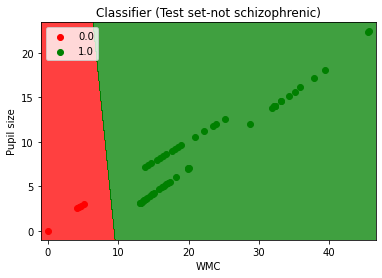

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
dataset = pd.read_csv('C:/Users/asus/Desktop/my patents/pupil vs wmc project/wmc vs schizophrenia.csv')
# input
dataset = dataset.fillna(0)


x = dataset.iloc[:,[0,1]].values


# output
y = dataset.iloc[:, 2].values
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
		x, y, test_size = 0.5, random_state = 0)

 
print (xtrain[0:100, :])

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

classifier.fit(xtrain, ytrain)



y_pred = classifier.predict(xtest)
print(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)
	
plt.title('Classifier (Test set-not schizophrenic)')
plt.xlabel('WMC')
plt.ylabel('Pupil size')
plt.legend()
plt.show()


